## Tree Methods Project
For this project, we will be exploring the use of tree methods to classify schools as Private or Public based off of their features.
Let's start by getting the data which is included in the ISLR library, the College dataframe.

A dataframe with 777 observation on the following 18 variables

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

Get the Data

__Call the ISLR library and check the head of College (a built-in dataframe with ISLR, use data() to check this.) Then reassign College to a dataframe called df__

In [1]:
library(ISLR)
head(College)
df <- College

Warning message:
"package 'ISLR' was built under R version 3.6.3"

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


## Exploratory Data Analysis
__Create a scatterplot of Grad.Rate verses Room.Board, colored by the Private column__

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

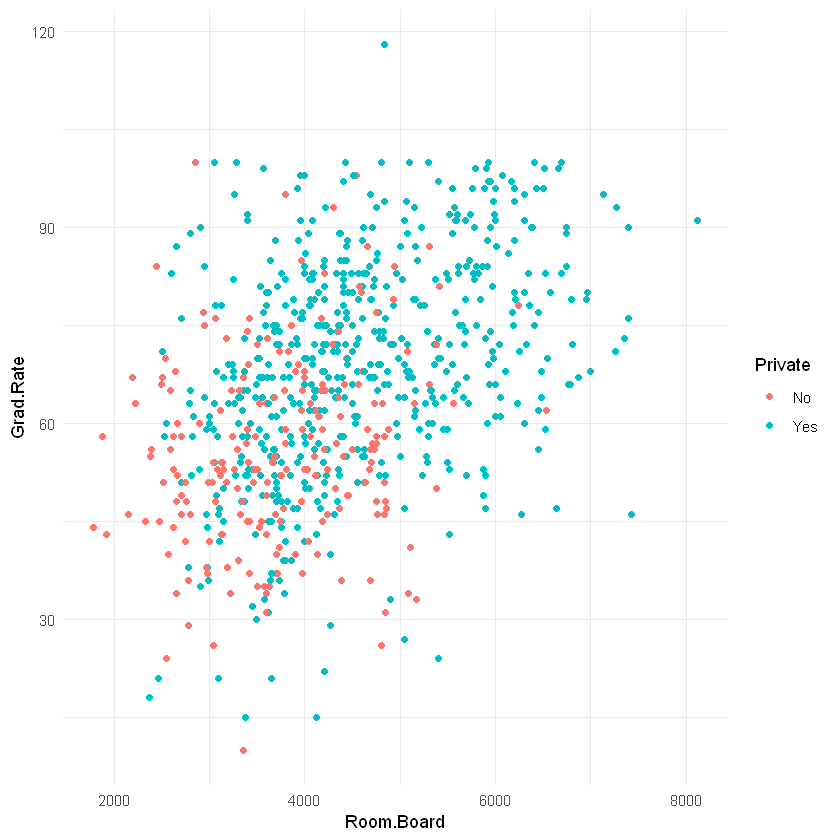

In [2]:
library(ggplot2)
ggplot(data = df, aes(x = Room.Board, y = Grad.Rate)) + 
geom_point(aes(color = Private)) +
theme_minimal()

__Create a histogram of full time undergrad students, color by Private__

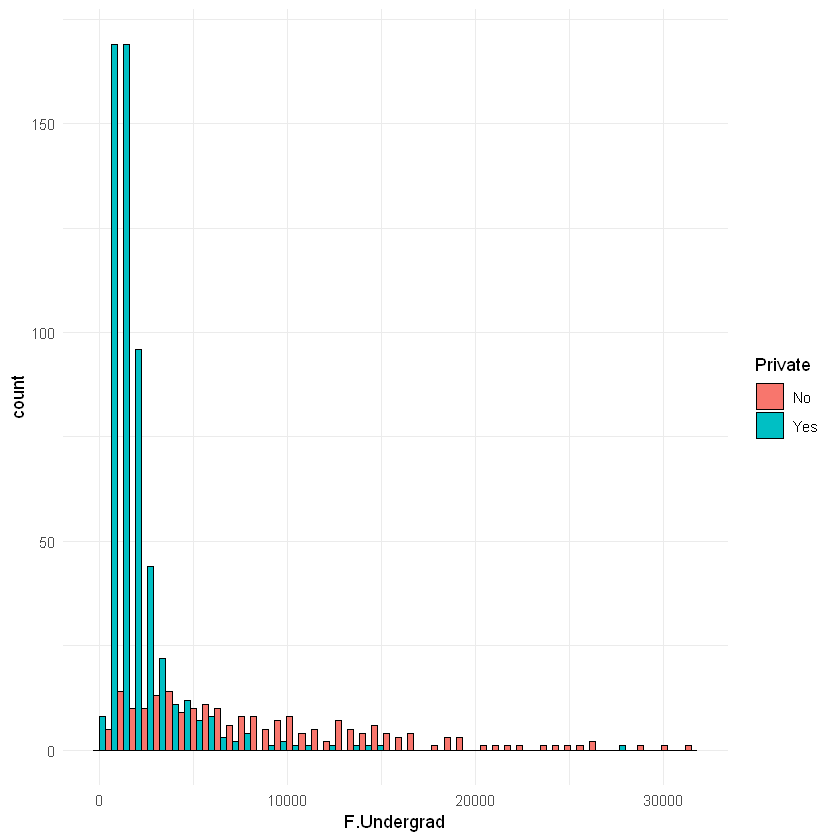

In [3]:
ggplot(data = df, aes(x = F.Undergrad)) + 
geom_histogram(aes(fill = Private), 
               position ="dodge", 
               color = "black", 
               bins = 50) +
theme_minimal()

__Create a histogram of Grad.Rate colored by Private. You should see something strange here.__

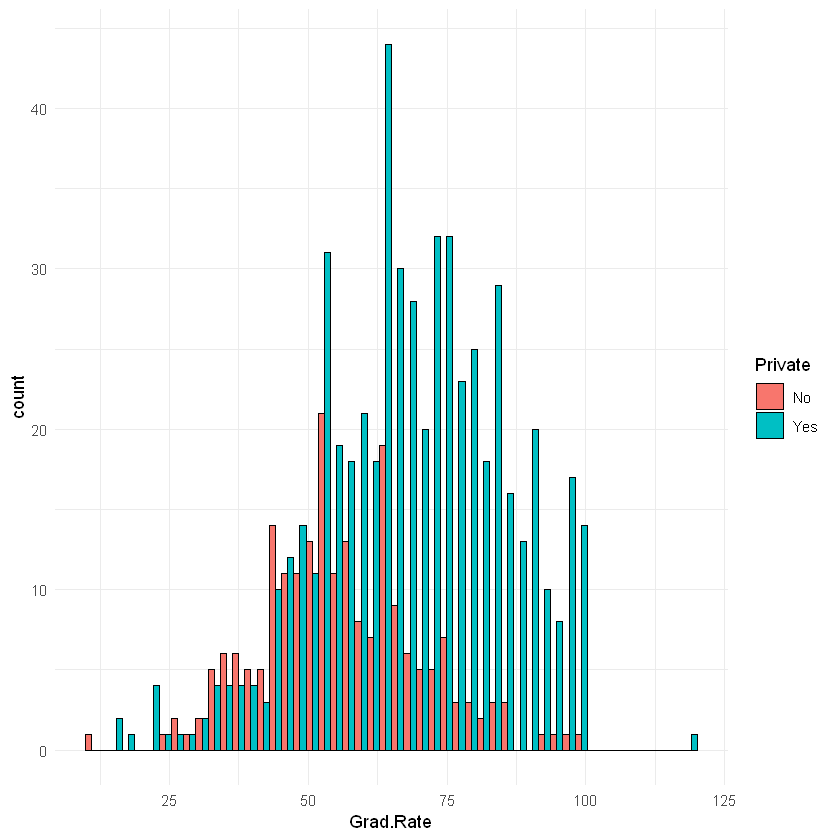

In [4]:
ggplot(data = df, aes(x = Grad.Rate)) + 
geom_histogram(aes(fill = Private), 
               position ="dodge", 
               color = "black", 
               bins = 50) +
theme_minimal()

__What college had a Graduation Rate above 100%__

In [5]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
subset(df, Grad.Rate >100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


__Change that college's grad rate to 100%__

In [7]:
df['Cazenovia College','Grad.Rate'] <- 100

## Train Test Split
__Split your data into training and testing sets 70/30. Use the caTools library to do this.__

In [8]:
library(caTools)

set.seed(101)
sample = sample.split(df$Private, SplitRatio = 0.7)

train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

## Decision Tree
__Use the rpart library to build a decision tree to predict whether or not a school is Private. Remember to only build your tree off of the training data.__

In [9]:
library(rpart)

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [10]:
tree <- rpart(Private ~ . , method = 'class', data = train)
summary(tree)

Call:
rpart(formula = Private ~ ., data = train, method = "class")
  n= 544 

          CP nsplit rel error    xerror       xstd
1 0.48648649      0 1.0000000 1.0000000 0.07013217
2 0.21621622      1 0.5135135 0.5945946 0.05803134
3 0.02702703      2 0.2972973 0.3581081 0.04673234
4 0.02027027      3 0.2702703 0.3918919 0.04863747
5 0.01000000      8 0.1554054 0.3918919 0.04863747

Variable importance
F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
         17          15          13          11          10           8 
  S.F.Ratio  Room.Board      Expend   Grad.Rate   Top10perc   Top25perc 
          7           5           4           4           3           1 

Node number 1: 544 observations,    complexity param=0.4864865
  predicted class=Yes  expected loss=0.2720588  P(node) =1
    class counts:   148   396
   probabilities: 0.272 0.728 
  left son=2 (164 obs) right son=3 (380 obs)
  Primary splits:
      F.Undergrad < 2992.5  to the right, improve=94.012

__Use predict() to predict the Private label on the test data.__

In [11]:
tree.preds <- predict(tree,test)

__Check the Head of the predicted values. You should notice that you actually have two columns with the probabilities.__

In [12]:
head(tree.preds)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


__Turn these two columns into one column to match the original Yes/No Label for a Private column.__

In [13]:
class(tree.preds)
tree.preds <- as.data.frame(tree.preds)
class(tree.preds)

joiner <- function(x){
    if (x >= 0.5){
        return('Yes')
    }else{
        return("No")
    }
}

[1] "matrix"

[1] "data.frame"

In [14]:
tree.preds$Private <- sapply(tree.preds$Yes,joiner)

In [15]:
head(tree.preds)

,No,Yes,Private
,<dbl>,<dbl>,<chr>
Adrian College,0.003311258,0.9966887,Yes
Alfred University,0.003311258,0.9966887,Yes
Allegheny College,0.003311258,0.9966887,Yes
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887,Yes
Alma College,0.003311258,0.9966887,Yes
Amherst College,0.003311258,0.9966887,Yes


__Now use table() to create a confusion matrix of your tree model.__



In [16]:
table(tree.preds$Private,test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

__Use the rpart.plot library and the prp() function to plot out your tree model__

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

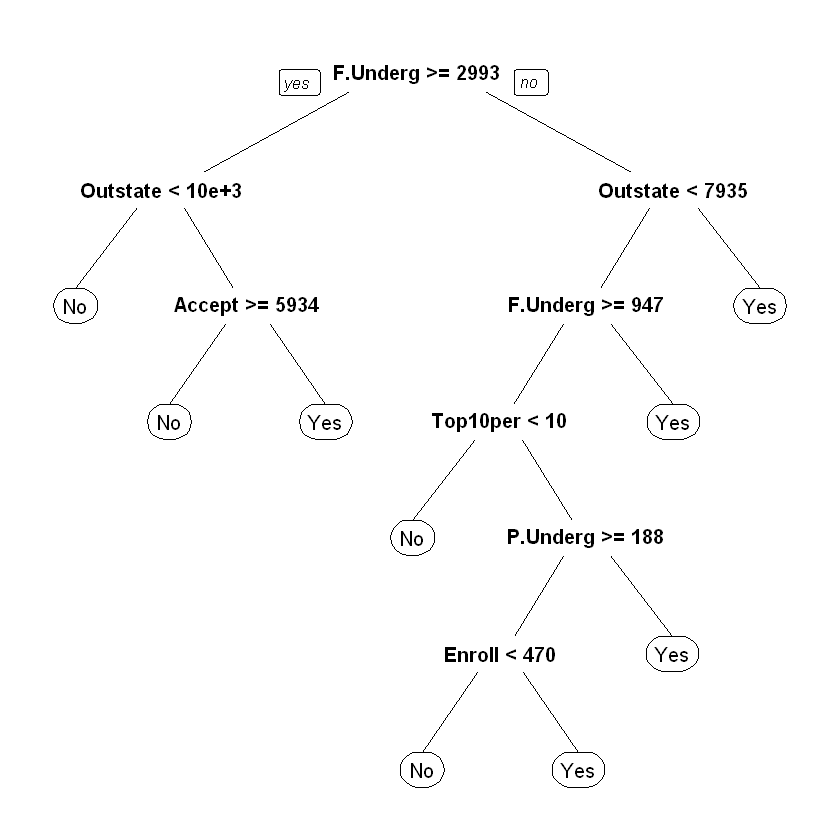

In [17]:
library(rpart.plot)
prp(tree)

## Random Forest

__Call the randomForest package library__

In [18]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



__Now use randomForest() to build out our model to predict Private class. Add importance=TRUE as a parameter in the model. (Use help(randomForest) to find out what this does)__

In [19]:
rf.model <- randomForest(Private ~ . , data = train, importance = TRUE)

In [20]:
rf.model$confusion

,No,Yes,class.error
No,125,23,0.15540541
Yes,10,386,0.02525253


__Grab the feature importance with model$importance. Refer to the reading for more info on what Gini means.__

In [21]:
rf.model$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.0299975940,1.581643e-02,0.0195732992,9.093474
Accept,0.0265169723,1.359972e-02,0.0169830344,11.252450
Enroll,0.0360668986,2.852824e-02,0.0305094654,22.810173
Top10perc,0.0094902570,5.700969e-03,0.0067307985,5.535670
Top25perc,0.0049996299,2.891095e-03,0.0035060616,4.568160
F.Undergrad,0.1591184093,6.945790e-02,0.0937286273,38.842710
P.Undergrad,0.0436610506,7.334280e-03,0.0170748529,16.934128
Outstate,0.1456738704,6.461743e-02,0.0865178571,42.669650
Room.Board,0.0147668601,1.439793e-02,0.0144179025,10.414502
Books,0.0007389787,8.914367e-05,0.0002868557,2.203342


## Predictions
__Now use your random forest model to predict on your test set!__

In [22]:
p <- predict(rf.model, test)

In [23]:
table(p, test$Private)
print(rf.model)

     
p      No Yes
  No   57   6
  Yes   7 163


Call:
 randomForest(formula = Private ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 6.07%
Confusion matrix:
     No Yes class.error
No  125  23  0.15540541
Yes  10 386  0.02525253


__It should have performed better than just a single tree, how much better depends on whether you are emasuring recall, precision, or accuracy as the most important measure of the model.__